In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import p3bo

In [13]:
p3bo.get_starting_sequence(alphabet="ABC", base_sequence="AAAAAAAAAA", identity_percent=80)

'AAAAAACAAB'

In [3]:
from flexs.models.levensthein import LevenstheinLandscape
from flexs.models.noisy_abstract_model import NoisyAbstractModel
from flexs.optimizers.adalead import Adalead
from flexs.optimizers.genetic_algorithm import GeneticAlgorithm
from flexs.optimizers.random import Random

In [4]:
protein_alphabet = "ACDEFGHIKLMNPQRSTVWY"
optimal_sequence = "MKYTKVMRYQIIKPLNAEWDELGMVLRDIQKETRAALNKTIQLCWEYQGFSADYKQIHGQYPKPKDVLGYTSMHGYAYDRLKNEFSKIASSNLSQTIKRAVDKWNSDLKEILRGDRSIPNFRKDCPIDIVKQSTKIQKCNDGYVLSLGLINREYKNELGRKNGVFDVLIKANDKTQQTILERIINGDYTYTASQIINHKNKWFINLTYQFETKETALDPNNVMGVDLGIVYPVYIAFNNSLHRYHIKGGEIERFRRQVEKRKRELLNQGKYCGDGRKGHGYATRTKSIESISDKIARFRDTCNHKYSRFIVDMALKHNCGIIQMEDLTGISKESTFLKNWTYYDLQQKIEYKAREAGIQVIKIEPQYTSQRCSKCGYIDKENRQEQATFKCIECGFKTNADYNAARNIAIPNIDKIIRKTLKMQ"

In [5]:
# Create a naive/mock model that simply computes the distance from the target optimum.
landscape = LevenstheinLandscape(optimal_sequence)
model = NoisyAbstractModel(landscape)

In [6]:
# Get a sequence 80% identical to the optimal.
starting_sequence = p3bo.get_starting_sequence(
    alphabet=protein_alphabet, base_sequence=optimal_sequence, identity_percent=80
) 

In [24]:
starting_sequence

'MKYTKVMRYQWIKDLNAEWDELGLVERANVKETRAALDKTIQECCEYQDFSADYKQIHGQYPKPLDVNGFTDTHGYAYFRGKVEWSKIIHSHLSQDIKRAVDKWWSLLKEILRDDMSIPNFRKDCPIDIVKQSTKIQGCNDGYVASLGLTNREYSNELGCKNGDIDVLIKANDKTQDTIDEPIIRGDYMYTASQIKNHKNDWFINNTYQFETKETALWPNNVMGVPLGQVYPVYIDWNNSLSRYHIKRGMIRRFRRFVEKQKREYLNKGKNCYDGRKGHVYTMRTKSIESISDKIARFRLTCNHKPSRFIVDMALKHNCGIIQTEDSNGISKESTFLKNWTYYDLQQKISIKAREAQFQVIKIEPQYTSQRMSKCFYIDKCNAQEQLTMKYIECGFKTNSNYVAARNIAIQNIDKIIGKTLLAG'

In [99]:
adalead = Adalead(
    model=model,
    rounds=10,
    sequences_batch_size=10,
    model_queries_per_batch=100,
    starting_sequence=starting_sequence,
    alphabet=protein_alphabet,
)
ga = GeneticAlgorithm(
    model=model,
    rounds=10,
    sequences_batch_size=10,
    model_queries_per_batch=100,
    starting_sequence=starting_sequence,
    alphabet=protein_alphabet,
    population_size=100,
    parent_selection_strategy="top-proportion",
    children_proportion=0.5,
    parent_selection_proportion=0.5,
)
r = Random(
    model=model,
    rounds=10,
    sequences_batch_size=10,
    model_queries_per_batch=100,
    starting_sequence=starting_sequence,
    alphabet=protein_alphabet,
)

In [103]:
optimizer = p3bo.P3bo(landscape=landscape, portfolio=[adalead, r], softmax_temperature=1.0, decay_rate=0.9, batch_size=10, starting_sequence=starting_sequence)

In [101]:
optimizer.step()

In [104]:
optimizer.sampling_weights

array([0.5, 0.5])

In [49]:
optimizer.optimize(num_steps=1000)

In [7]:
import pandas as pd
import numpy as np

In [8]:
landscape.cost

0

In [9]:
sequences_data = pd.DataFrame(
            {
                "sequence": starting_sequence,
                "model_score": np.nan,
                "true_score": landscape.get_fitness([starting_sequence]),
                "round": 0,
                "model_cost": model.cost,
                "measurement_cost": 1})
           

In [19]:
measured_sequences = pd.DataFrame([
    p3bo.Measurement(
        round=0,
        sequence=starting_sequence,
        model_score=np.nan,
        true_score=landscape.get_fitness([starting_sequence]).item(),
    )
])

In [50]:
optimizer.step()

KeyboardInterrupt: 

In [20]:
measured_sequences

,round,sequence,model_score,true_score
0,0,MKYTKVMTFQIIPPFNAEWDELGVVWRDIQKETIAALEKTCQLCWG...,NaN,85


In [26]:
optimizer.measured_sequences

,round,sequence,model_score,true_score
0,0,MKYTKVMTFQIIPPFNAEWDELGVVWRDIQKETIAALEKTCQLCWG...,NaN,85


In [21]:
adalead.propose_sequences(measured_sequences=sequences_data)

(array(['CKYTKVMTFQIIPPFNAEWDELGVVWRDIQKETIAALEKTCQLCWGYQGLSADYKQPHVRYTKPKDVLGYTSMHGYAHDRLKNEFSTIAHSNLSQTIARHVDKWNSWLPFILRGDRIIPNDRKDCPGLIVKHSTKIWKCFDGYVLTLGLINTEWANELTRKMGMFDVLSMANDKTPQGILERITNHDYTYTASQIINPKCKYDINLTYQFETWETALDPNNVMGVDSDIFYPWYIAFNNSLHRYHIKGGEIEPFRLQVEKRKREFLNQGKYCIDGRKGHGYLTRTKSIESIIDYIRRFRDLCNDKYSGGIRDMALKHNCGIEQMEDLHPPSKEAIFLKNWTFYDNQQKIEYKARGAGIQVIKIEPQYCSQRYSQMNYIDKENRQEQAIFKCIECGSKTAYDYNIARHIAIPNIDKIIRKTLKMQ',
        'MKYTKVMTFQIIPPFNAEWDELGVVWRDIQKETIAALEKTCQLCWGYQGLSADYKQPHVRYTKPKDVLGYTSMHGYAHDRLKNEFSTIAHSNLSQTIARHVDKWNSWLPFILRGDRIIPNDRKDCPGLIVKHSTKIWKCFDGYVLTLGLINTEWANELTRKMGMFDVLSMANDKTPQGILERITNHDKTYTASQIINPKCKYDINLTYQFETWETALDPNNVMGVDSDIFYPWYIAFNNSLHRYHIKGGEIEPFRLQVEKRKREFLNQGKYCIDGRKGHGYLTRTKSIESIIDYIRRCRDLCNDKYSGGIRDMALKHNCGIEQMEDLHPPSKEAIFLKNWTFYDNQQKIEYKARGAGIQVIKIEPQYCSQRYSQMNYIDKENRQEQAIFKCIECGSKTAYDYNIARHIAIPNIDKIIRKTLKMQ',
        'MKYFKVMTFQIIPPFNAEWDELGVVWRDIQKETIAALEKTCQLCWGYQGLSADYKQPHVRYTKPKDVLGYTSMHGYAHDRLKNEFSTIRHSNLSQTIARHVDKWNSWLPFILRGDRIIP

In [40]:
s = p3bo.sample_from_explorer(explorer=adalead, measured_sequences=optimizer.measured_sequences)

In [44]:
next(s)

Candidate(sequence='MKYTKVMTFQIIPPFNAEWDELGVVWRDIQKETIAALEKTCQLCWGYQMLSADYKQPHVRYTKPKDVLGYTSMHGYAHDRLKNEFSTIAHSNLSQTIARHPDKWNSWLPFILRGDRIIPNDRKDCPGLIVKHSTKIWKCFDGYVLTLGLINTEWANELTRKMGMFDVLSMANDKTPQGILERITNHDYTYTASQIINPKCKYDINLTMQFETWETALDPNNVMGVDSDIFYPWYIAFNNSLHRYHIKGGEIEPFRLQVEKRKREFLNQGKYHIDGRKGHGYLTRTKSIPSIIDYIRRLRDLCNDKYSGGIRDMALKHNCGIEQMEELHPPSKEAIFLKNWTFYSNQQKIEYKARGAGIQVIKIEPQYCSQRYSQMNYIDKENRQEQAIFKCIECGSKTAYDYNIARHIAIPNIDKIIRKTLKMQ', model_score=96.26503382500124)

In [27]:
import random

In [28]:
random.choice(range(10), weights=[1]*10)

TypeError: Random.choice() got an unexpected keyword argument 'weights'

In [111]:
optimizer.optimize(num_steps=10)

Optimizing ...:   0%|          | 0/10 [00:00<?, ?it/s]

<Axes: xlabel='round'>

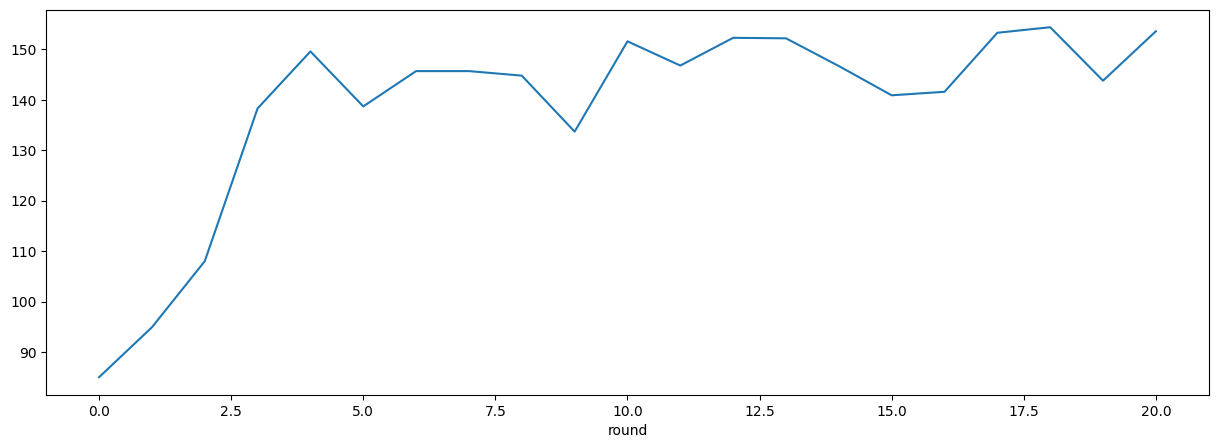

In [112]:
optimizer.measured_sequences.groupby("round").true_score.mean().plot(figsize=(15, 5))

<Axes: xlabel='round'>

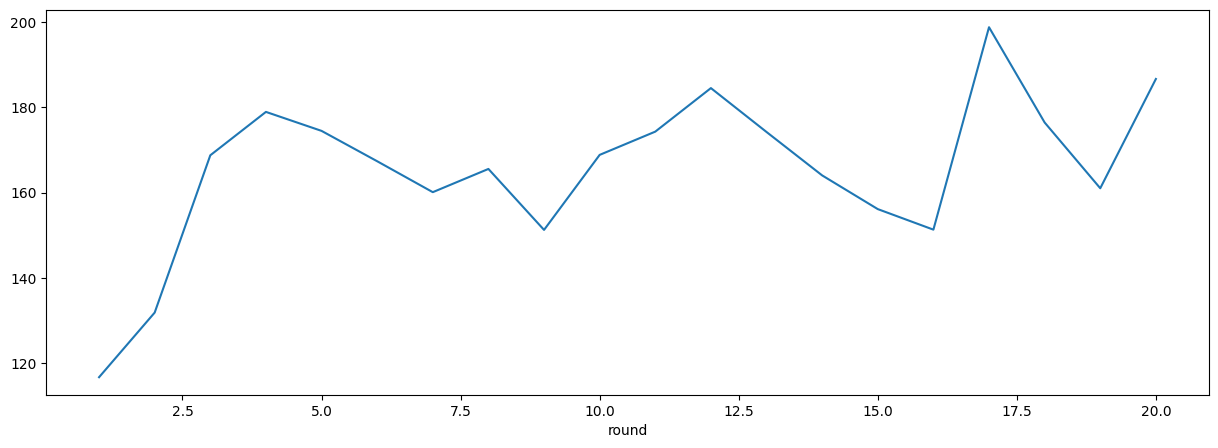

In [113]:
optimizer.measured_sequences.groupby("round").model_score.mean().plot(figsize=(15, 5))